In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons
import plotly.express as px

np.random.seed(42)
sns.set(font_scale=1.3)

### 1. Dane

In [4]:
n_samples=700
raw_data = make_moons(n_samples=700, noise=0.25, random_state=42)
data = raw_data[0]
target = raw_data[1]

print(f'{data[:5]}\n')
print(f'{target[:5]}')

[[-0.15995017  1.03638621]
 [ 1.13114102 -0.58763612]
 [ 0.16966619  0.09420938]
 [ 0.51772753  0.81518706]
 [-0.68002085  0.15563468]]

[0 1 1 0 0]


In [5]:
df = pd.DataFrame(data=np.c_[data, target], columns=['x1', 'x2', 'target'])
df.head()

,x1,x2,target
0,-0.159950,1.036386,0.0
1,1.131141,-0.587636,1.0
2,0.169666,0.094209,1.0
3,0.517728,0.815187,0.0
4,-0.680021,0.155635,0.0


In [19]:
fig = px.colors.sequential.swatches_continuous()
px.scatter(df,x='x1', y='x2', color='target', title='Classification x1, x2', 
           color_continuous_scale=px.colors.sequential.Viridis)

### 2. Test/train split

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target)

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (525, 2)
X_test shape: (175, 2)
y_train shape: (525,)
y_test shape: (175,)


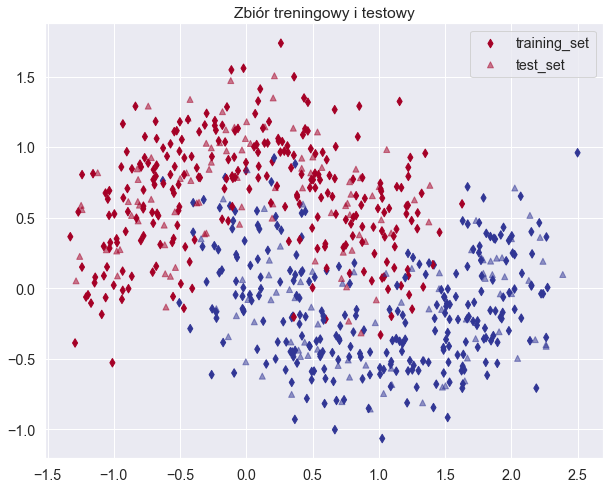

In [26]:
plt.figure(figsize=(10, 8))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='RdYlBu', marker="d", label = 'training_set')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='RdYlBu', marker='^', alpha=0.5, label='test_set')
plt.title('Zbiór treningowy i testowy')
plt.legend()
plt.show()

### 3. Model drzew decyzyjnych

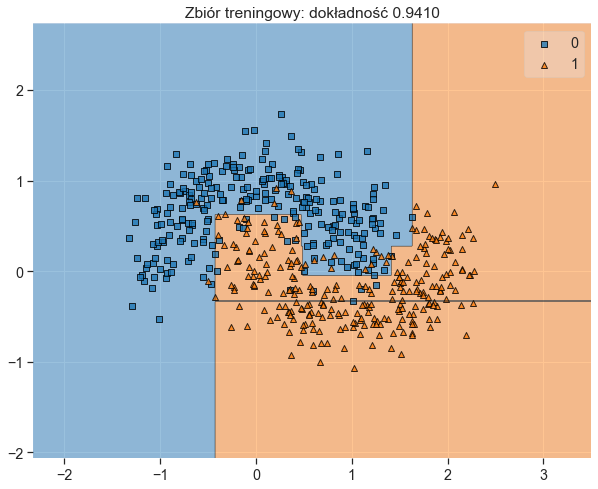

In [27]:
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_decision_regions

classifier = DecisionTreeClassifier(max_depth=5, min_samples_split=5)
classifier.fit(X_train, y_train)

plt.figure(figsize=(10, 8))
plot_decision_regions(X_train, y_train, classifier)
plt.title(f'Zbiór treningowy: dokładność {classifier.score(X_train, y_train):.4f}')
plt.show()

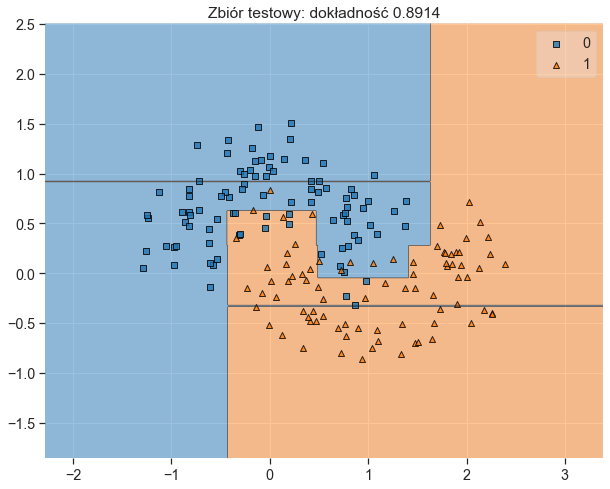

In [33]:
plt.figure(figsize=(10, 8))
plot_decision_regions(X_test, y_test, classifier)
plt.title(f'Zbiór testowy: dokładność {classifier.score(X_test, y_test):.4f}')
plt.show()

### 4. Walidacja krzyżowa

In [39]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [40]:
classifier = DecisionTreeClassifier(max_depth=5, min_samples_split=5)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=5)

In [42]:
# walidacja krzyżowa

scores = cross_val_score(classifier,X_train, y_train, cv=10)
scores

array([0.86792453, 0.88679245, 0.94339623, 0.9245283 , 0.98113208,
       0.92307692, 0.94230769, 0.96153846, 0.88461538, 0.88461538])

In [43]:
print(f'Accuracy: {scores.mean():.4f} (+/- {scores.std():.4f})')

Accuracy: 0.9200 (+/- 0.0359)


In [44]:
classifier = DecisionTreeClassifier(max_depth=5, min_samples_split=5)

scores = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=15)
scores

array([0.85714286, 0.85714286, 0.91428571, 0.97142857, 0.91428571,
       0.91428571, 0.97142857, 0.91428571, 0.91428571, 0.97142857,
       0.88571429, 0.97142857, 0.94285714, 0.85714286, 0.85714286])

In [45]:
print(f'Accuracy: {scores.mean():.4f} (+/- {scores.std():.4f})')

Accuracy: 0.9143 (+/- 0.0430)


In [46]:
scores = pd.DataFrame(scores, columns=['accuracy'])
scores

,accuracy
0,0.857143
1,0.857143
2,0.914286
3,0.971429
4,0.914286
5,0.914286
6,0.971429
7,0.914286
8,0.914286
9,0.971429


In [47]:
px.bar(scores, y='accuracy', color='accuracy', width=700, height=400, 
       title=f'Walidacja krzyżowa (15 podziałów) | Accuracy: {scores.mean()[0]:.4f} (+/- {scores.std()[0]:.3f})',
       color_continuous_scale=px.colors.sequential.Inferno_r, range_color=[scores.min()[0] - 0.01, 1.0])